In [1]:
# import tensorflow as tf
import glob
import cv2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cv2.__version__

'4.1.0'

In [4]:
train_img = glob.glob(r'C:\Users\bibhu\My_study_Doc\Project_current\train\*jpg')

In [5]:
len(train_img)

25361

In [54]:
train_img[0]

'C:\\Users\\bibhu\\My_study_Doc\\Project_current\\train\\0000e88ab.jpg'

In [55]:
img = cv2.imread(train_img[0],0)
# # cv2.imshow('Test_img',img)
# cv2.waitKey(5)
re = cv2.resize(img,(128,128))

In [56]:
# re

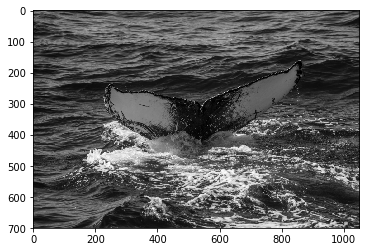

In [57]:
plt.imshow(img,cmap='gist_gray')

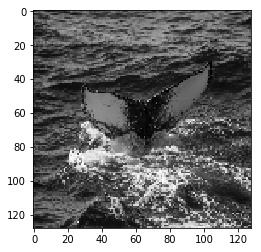

In [58]:
plt.imshow(re,cmap='gist_gray')

In [61]:
# cv2.imwrite('train_rezsize\\'+train_img[0].split('\\')[-1],re) #successful

True

Resize all image to 128 X 128

In [63]:
#For train data
for im_p in train_img:
    img = cv2.imread(im_p,0)
    re = cv2.resize(img,(128,128))
    cv2.imwrite('train_resize\\'+im_p.split('\\')[-1],re)

In [64]:
#For test data
test_img = glob.glob(r'C:\Users\bibhu\My_study_Doc\Project_current\test\*jpg')

In [65]:
for im_p in test_img:
    img = cv2.imread(im_p,0)
    re = cv2.resize(img,(128,128))
    cv2.imwrite('test_resize\\'+im_p.split('\\')[-1],re)

In [66]:
import pandas as pd

In [67]:
train_df = pd.read_csv('train.csv')

In [68]:
train_df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25361 entries, 0 to 25360
Data columns (total 2 columns):
Image    25361 non-null object
Id       25361 non-null object
dtypes: object(2)
memory usage: 396.3+ KB


In [76]:
cv2.imread('train_resize\\'+train_df['Image'][0],0)

array([[ 49,  65,  61, ...,  41,  64, 109],
       [123, 134, 128, ...,  64,  81,  77],
       [ 34,  36,  42, ...,  68,  56,  69],
       ...,
       [ 60,  63,  69, ...,  38,  33,  39],
       [ 70,  91,  96, ...,  36, 145, 131],
       [ 54,  38,  25, ..., 131,  36,  36]], dtype=uint8)

In [81]:
train_df['Im_mat'] = train_df['Image'].apply(lambda x : cv2.imread('train_resize\\'+x,0))

In [82]:
train_df.head(10)

,Image,Id,Im_mat
0,0000e88ab.jpg,w_f48451c,"[[49, 65, 61, 80, 100, 105, 74, 44, 39, 29, 38..."
1,0001f9222.jpg,w_c3d896a,"[[180, 164, 115, 105, 149, 165, 129, 113, 122,..."
2,00029d126.jpg,w_20df2c5,"[[223, 221, 223, 221, 228, 235, 227, 218, 200,..."
3,00050a15a.jpg,new_whale,"[[178, 179, 179, 178, 178, 178, 177, 176, 177,..."
4,0005c1ef8.jpg,new_whale,"[[59, 54, 60, 53, 61, 58, 55, 65, 66, 69, 60, ..."
5,0006e997e.jpg,new_whale,"[[210, 210, 207, 212, 211, 208, 211, 202, 195,..."
6,000a6daec.jpg,w_dd88965,"[[191, 221, 244, 212, 190, 199, 222, 179, 169,..."
7,000f0f2bf.jpg,new_whale,"[[189, 189, 200, 198, 199, 203, 202, 197, 193,..."
8,0016b897a.jpg,w_64404ac,"[[140, 152, 173, 173, 174, 182, 161, 155, 133,..."
9,001c1ac5f.jpg,w_a6f9d33,"[[247, 250, 254, 246, 249, 245, 254, 255, 254,..."


In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25361 entries, 0 to 25360
Data columns (total 3 columns):
Image     25361 non-null object
Id        25361 non-null object
Im_mat    25361 non-null object
dtypes: object(3)
memory usage: 594.5+ KB


In [84]:
test_df = pd.read_csv('sample_submission.csv')
test_df.head()

,Image,Id
0,00028a005.jpg,new_whale w_23a388d w_9b5109b w_9c506f6 w_0369a5c
1,000dcf7d8.jpg,new_whale w_23a388d w_9b5109b w_9c506f6 w_0369a5c
2,000e7c7df.jpg,new_whale w_23a388d w_9b5109b w_9c506f6 w_0369a5c
3,0019c34f4.jpg,new_whale w_23a388d w_9b5109b w_9c506f6 w_0369a5c
4,001a4d292.jpg,new_whale w_23a388d w_9b5109b w_9c506f6 w_0369a5c


In [86]:
test_df.drop('Id',axis=1,inplace=True)

In [88]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7960 entries, 0 to 7959
Data columns (total 1 columns):
Image    7960 non-null object
dtypes: object(1)
memory usage: 62.3+ KB


In [89]:
test_df['Im_mat'] = test_df['Image'].apply(lambda x : cv2.imread('test_resize\\'+x,0))

In [90]:
test_df.head()

,Image,Im_mat
0,00028a005.jpg,"[[184, 183, 189, 192, 191, 193, 194, 188, 190,..."
1,000dcf7d8.jpg,"[[175, 163, 171, 177, 170, 161, 150, 161, 157,..."
2,000e7c7df.jpg,"[[188, 187, 192, 206, 217, 203, 188, 173, 166,..."
3,0019c34f4.jpg,"[[137, 132, 148, 134, 125, 136, 144, 122, 104,..."
4,001a4d292.jpg,"[[63, 68, 62, 70, 81, 77, 62, 56, 60, 71, 78, ..."


In [91]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7960 entries, 0 to 7959
Data columns (total 2 columns):
Image     7960 non-null object
Im_mat    7960 non-null object
dtypes: object(2)
memory usage: 124.5+ KB


In [92]:
import pickle

In [93]:
# pickle df to use in training and testing notebook
with open('Pickled_df/train_df.pickle','wb') as f:
    pickle.dump(train_df,f)

with open('Pickled_df/test_df.pickle','wb') as f:
    pickle.dump(test_df,f)

Continue in CNN notebook